In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Описание проекта


Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.
Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.  
**Порядок действий:**  
- Загрузите и изучите данные.
- Ответьте на вопрос и обоснуйте решение. 
- Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
  - a. Изменится. Приведите примеры матриц.
  - b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.
-  Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.
- Запрограммируйте этот алгоритм, применив матричные операции. Проверьте, что качество линейной регрессии из sklearn не отличается до и после преобразования. Примените метрику R2.


In [2]:
try:
    df = pd.read_csv('/datasets/insurance.csv')
except:
    df = pd.read_csv('/Users/v.rakhaev/Desktop/Yandex/sprint_13/insurance.csv')

In [3]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
df.shape

(5000, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [6]:
df['Возраст'] = df['Возраст'].astype(int)

In [7]:
df.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

In [8]:
df.duplicated().sum()

153

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

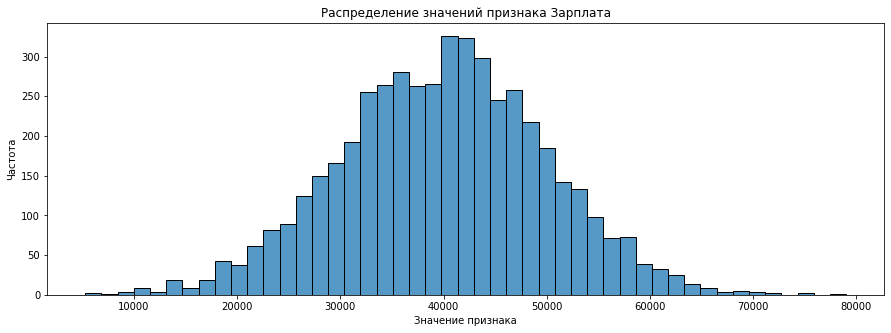

In [11]:
plt.figure(figsize = (15,5))
sns.histplot(df['Зарплата'])
plt.title('Распределение значений признака Зарплата')
plt.xlabel('Значение признака')
plt.ylabel('Частота')
plt.show()


## Выводы по 1 блоку

1. Выгружены данные
2. Признак **возраст** переведен из типа флот в тип инт
3. Пропуски не выявлены
4. Явные дубликаты выявлены и устранены
5. Построена гистограмма распредения признака **зарплата**, которая похожа на нормальное распределение
6. Приступаем к построение модели

# Теоретический блок

**Шифрование**  
Для проведения алгоритма шифрования необходимо:
Подобрать случайную обратимую матрицу, которая соотвествовала условиям для умножения на исходыне данные (ширина исходных данных, и размеры случайной (квадратной) матрицы должны совпадать.  
**Обратная матрица**  
Определение: Матрица $B$ называется обратной к матрице $А$ , если $A * B = B * A = E$ (единичная матрица). Обратная матрица обозначается через $A^{-1}$, следовательно $A * A^{-1} = A^{-1} * A = E$  
Исходные данные умножаются на случайную обратимую матрицу, после чего получаются зашифрованные данные.  
**Алгоритм восстановления первоначальных данных после шифрования** происходит путем умножения обратной матрицы от рандомной на зашифрованнаю  
Обозначения для работы с уровнениями линейной регрессии:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $Q$ — матрица, на которую умножаются признаки (рандомная матрица)

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

- $E$ - единичная матрица 

Формула предскаязания:  
$a = Xw$  
Формула обучения:  
$w = (X^T X)^{-1} X^T y$  

Введем новое значение - $R$, $R = XQ$, где $Q$ - рандомная обратимая матрица, которая соответствуют условиям умножения на матрицу $X$ 
Проведем расчеты:

$a_1 = R w_1$   
$w_1 = (R^T R)^{-1} R^T y$  

Подставим значение $w_1$ в правую часть уравнения:  
$a_1 = R(R^T R)^{-1} R^T y$

Поставим вместо  $R$ $XQ$:  
$a_1 = XQ ((XQ)^T (XQ))^{-1} (XQ)^T y$  

Прведем группировку и воспользуемся ствойством обратной матрицы:  
$(AB)^{-1} = B^{-1} A^{-1}$

$a_1 = XQ(Q^T X^T XQ)^{-1} Q^T X^T y$ 

$a_1 = XQ(Q^T (X^T X) Q)^{-1} Q^T X^T y$

$a_1 = XQQ^{-1} (X^T X)^{-1} (Q^T)^{-1} Q^T X^T y$

$QQ^{-1} = E$

Заменим выражения $QQ^{-1}$ и $(Q^T)^{-1} Q^T$ на единичную матрицу (по правилу $AA^{-1} = E$)  

$a_1 = XE(X^T X)^{-1} EX^T y$  

$a_1 = X(X^T X)^{-1}X^T y$

Выражение $(X^T X)^{-1}X^T y$ можно заменить на $w$, следовательно:  
$a_1 = Xw$



Как видно из последней формулы, значения предсказаний не меняются, поэтому:  
**Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?**  
**Ответ - не изменися**  
Подтверждение расчетами будет представлено ниже




## Построение моделей

**Ручное умножение матриц для сравнения с моделью LinearRegression из sklearn**

In [12]:
features = df.drop('Страховые выплаты',axis = 1)

In [13]:
target = df['Страховые выплаты']

In [14]:
X = np.concatenate((np.ones((features.shape[0], 1)), features), axis=1)
y = target
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
w[1:]

array([ 9.46018141e-03,  3.61640081e-02, -1.38991363e-07, -1.42517371e-02])

In [15]:
model = LinearRegression()
model.fit(features,target)
model.coef_

array([ 9.46018141e-03,  3.61640081e-02, -1.38991363e-07, -1.42517371e-02])

**Коэффициенты матрицы после умножения и после применения модели LinearRegression из sklearn совпадают, следовательно расчеты проведены верно**

разобьем датасет на обучающую и тестовую выборки для построения и определения кэффициента R2 на исходынх данных

In [16]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=54321)

In [17]:
model = LinearRegression()
model.fit(features_train,target_train)
prediction = model.predict(features_test)
R2 = r2_score(target_test,prediction)
print('R2 =', round(R2,3))

R2 = 0.409


**Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)**

Для проверки теории создадим обратную матрицу и проведем соответствующие расчеты

In [18]:
np.random.seed(12345)
random_matrix = np.random.randint(1,10,(features.shape[1],features.shape[1]))
features_train_random_matrix = np.dot(features_train,random_matrix)
features_test_random_matrix = np.dot(features_test,random_matrix)

In [19]:
model = LinearRegression()
model.fit(features_train_random_matrix,target_train)
prediction = model.predict(features_test_random_matrix)
R2 = r2_score(target_test,prediction)
print('R2 =', round(R2,3))

R2 = 0.409


In [20]:
np.round(np.dot(random_matrix,np.linalg.inv(random_matrix)).astype(float)) #проверил, что матрица - обратимая

array([[ 1., -0.,  0., -0.],
       [-0.,  1., -0., -0.],
       [-0.,  0.,  1., -0.],
       [-0., -0.,  0.,  1.]])

In [21]:
back_to_original = np.dot(features_train_random_matrix, np.linalg.inv(random_matrix))

In [22]:
(np.round(back_to_original.astype(float))).astype(int) == features_train #Данные сходятся

,Пол,Возраст,Зарплата,Члены семьи
2205,True,True,True,True
3833,True,True,True,True
1273,True,True,True,True
535,True,True,True,True
749,True,True,True,True
...,...,...,...,...
1185,True,True,True,True
2050,True,True,True,True
4325,True,True,True,True
4895,True,True,True,True


In [23]:
back_to_original_2 = np.dot(features_test_random_matrix, np.linalg.inv(random_matrix))

In [24]:
(np.round(back_to_original_2.astype(float))).astype(int) == features_test #Данные сходятся

,Пол,Возраст,Зарплата,Члены семьи
1,True,True,True,True
1951,True,True,True,True
2575,True,True,True,True
3162,True,True,True,True
813,True,True,True,True
...,...,...,...,...
2504,True,True,True,True
2002,True,True,True,True
4797,True,True,True,True
3394,True,True,True,True


**Значения R2 на исходных данных и после умножения исходных данных на обратную матрицу полностью совпадают. Качество линейной регрессии не изменилось.**

**Проведем обучение и прогонку модели с применением стандартизации**

In [25]:
scaler = StandardScaler()
scaler.fit(features_train)
features_train_scaled = pd.DataFrame(scaler.transform(features_train), columns = features_train.columns)
features_test_scaled = pd.DataFrame(scaler.transform(features_test), columns = features_test.columns)
features_train_random_matrix_scaled = pd.DataFrame(scaler.transform(features_train_random_matrix),columns = features_train.columns)
features_test_random_matrix_scaled = pd.DataFrame(scaler.transform(features_test_random_matrix),columns = features_train.columns)

In [26]:
model = LinearRegression()
model.fit(features_train_scaled,target_train)
prediction = model.predict(features_test_scaled)
R2 = r2_score(target_test,prediction)
print('R2 =', round(R2,3))

R2 = 0.409


Результат полностью совпадает с предыдущими моделями

Стандартизируем данные после умножения на обратимую матрицу и проведем расчеты

In [27]:
model = LinearRegression()
model.fit(features_train_random_matrix_scaled,target_train)
prediction = model.predict(features_test_random_matrix_scaled)
R2 = r2_score(target_test,prediction)
print('R2 =', round(R2,3))

R2 = 0.409


Аналогичная ситуация и в этом случае, R2 = 0.409

# Общие выводы

- Проведен анализ исходных данных, проведена подготовка для дальшей работы
- выполнено умножение матриц для определения коэффициентов w
- Построены следующие модели:
  - LinearRegression на исходных данных с рабивкой на выборки для теста и обучения
  - LinearRegression на исходных данных после умнжения на обратную матрицу 
  - LinearRegression на стандартизированных данных
  - LinearRegression на на исходных данных после умнжения на обратную матрицу, а так же с последующим применением стандартизации
- Все модели показали аналогичное значение R2 = 0.409